# HW1
## TODO:  Your ID goes here:

#### TODO: You emails for here:

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D


In [2]:

### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [3]:
### Imports
import torch
import torch.nn as nn

In [4]:
### Preprocessing function ####
def preprocess_data(X, y):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  X_tensor = torch.from_numpy(X).to(device).float()
  y_tensor = torch.from_numpy(y).to(device)

  return X_tensor, y_tensor

In [5]:
### Training function ###
def train(model, X, y, num_epochs, optimizer, criterion):
  train_losses = []
  model.train()

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

  final_train_loss = criterion(model(X), y)
  train_losses.append(final_train_loss.item())
  return model, train_losses

In [6]:
### Evaluation function ###
def evaluate(model, X, y):
  model.eval()
  with torch.no_grad():
    y_pred = np.argmax(model(X).detach().cpu().numpy(), axis=1)
  accuracy = np.mean(y_pred == y.cpu().numpy())
  return accuracy

In [7]:
### Plot training loss function ###
def plot_loss(train_losses):
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, len(train_losses) + 1), train_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim(0,1)
  plt.title("Training Loss Function")
  plt.show()

In [8]:
### Plot predicted labels and decision boundaries ###
def plot_decision_boundary(model, X, y):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  min_x, max_x = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  min_y, max_y = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xs = torch.linspace(min_x, max_x, steps=500)
  ys = torch.linspace(min_y, max_y, steps=500)
  xx, yy = torch.meshgrid(xs, ys)
  grid = torch.stack([xx.ravel(), yy.ravel()], dim=1).to(device)
  model.eval()
  with torch.no_grad():
    y_pred = torch.argmax(model(X).detach().cpu(), axis=1)
    decision_boundaries = torch.argmax(model(grid).detach().cpu(), axis=1)
  accuracy = torch.mean((y_pred == y.cpu()).float())
  plt.scatter(xx, yy, c=decision_boundaries, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y_pred, cmap=plt.cm.Spectral, edgecolor='black')
  plt.title(f"Accuracy: {accuracy.item():.3f}")
  plt.show()

## EX1

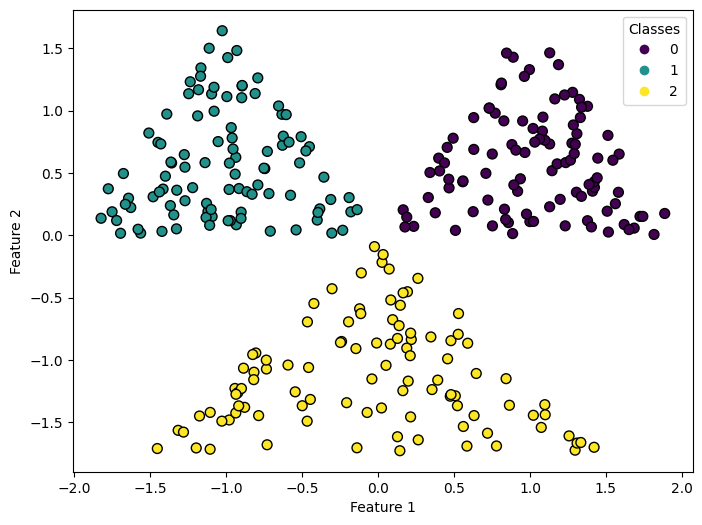

In [ ]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

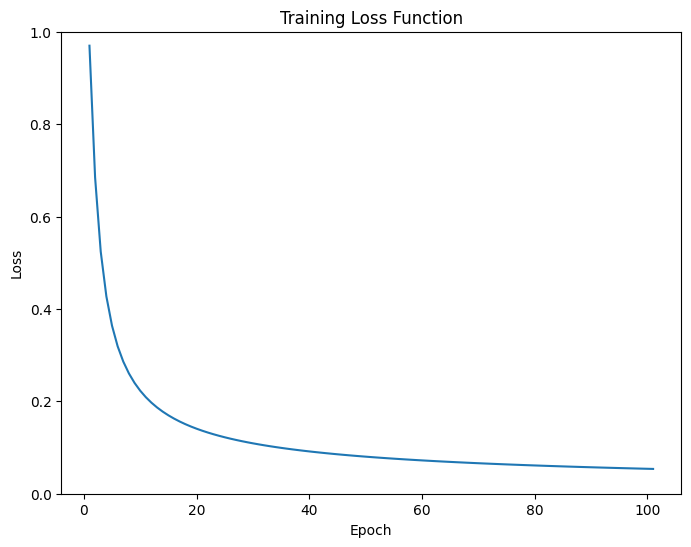


Train data desicion boundaries:



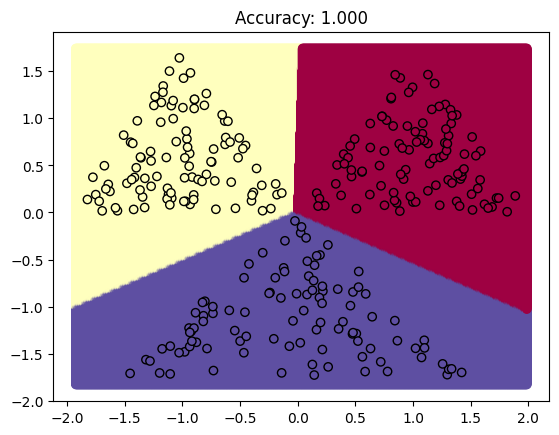


Test data desicion boundaries:



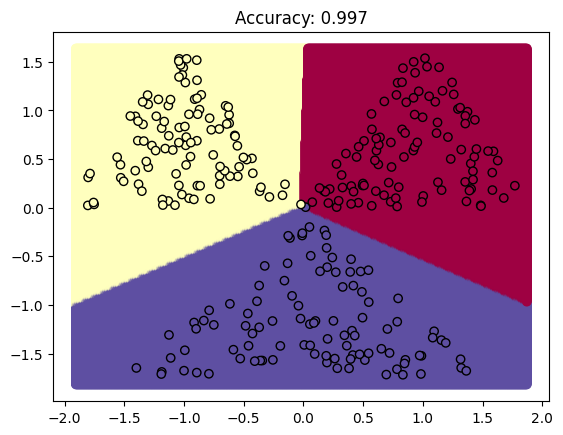

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

input_size = 2
hidden_size = 512
output_size = 3

linear_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Linear(hidden_size, output_size),
).to(device)

lr = 0.01
num_epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=lr)

linear_model, train_losses = train(linear_model, X_train, y_train, num_epochs, optimizer, criterion)
plot_loss(train_losses)
print("\nTrain data desicion boundaries:\n")
plot_decision_boundary(linear_model, X_train, y_train)
print("\nTest data desicion boundaries:\n")
plot_decision_boundary(linear_model, X_test, y_test)


The model performed well because the data is conveniently divided into 3 distinct triangle groups which are easy to seperate linearly.
Because the data is linearly seperable we chose a linear classifier -  a shallow neural network without activation functions and we gradually increased the number of hidden layer neurons until the training loss became small and the train and test accuracy didn't improve anymore.

## EX2

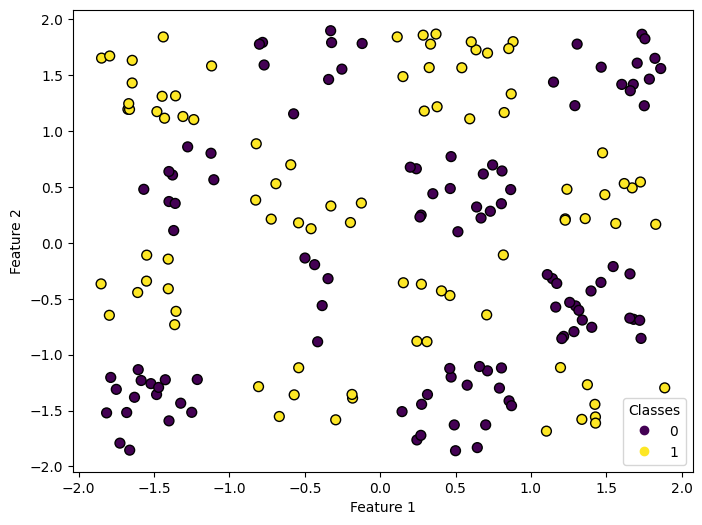

In [ ]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

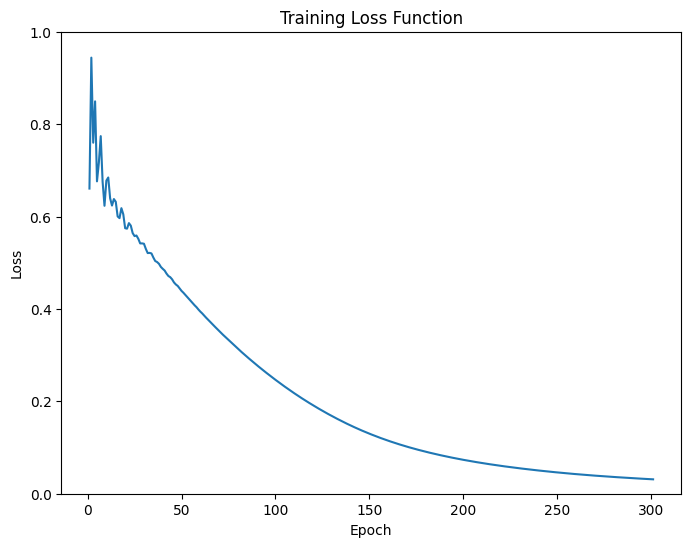


Train data desicion boundaries:



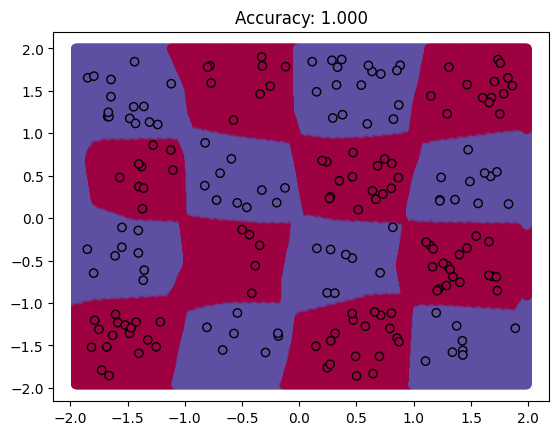


Test data desicion boundaries:



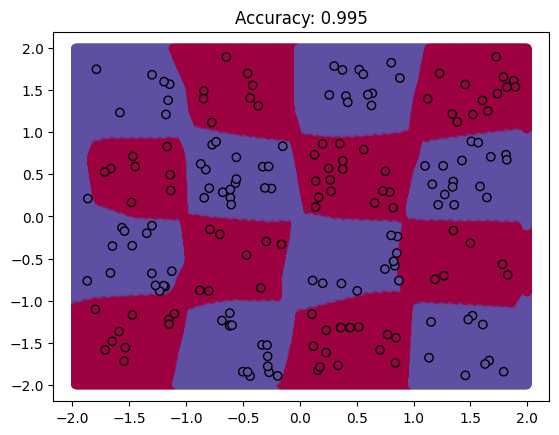

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

input_size = 2
hidden_size = 1024
output_size = 2

mlp_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
).to(device)

lr = 0.005
num_epochs = 300
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=lr)

mlp_model, train_losses = train(mlp_model, X_train, y_train, num_epochs, optimizer, criterion)
plot_loss(train_losses)
print("\nTrain data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_train, y_train)
print("\nTest data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_test, y_test)


The model performed well because in each blob of points the points are from the same class, so they are quite easy to seperate. This data is not linearly seperable, so we chose a simple MLP model. We also changed the optimizer from SGD to Adam because with SGD the optimization was unstable and we didn't get a smooth convergence of the loss function, and the accuracy wasn't as high.
We also needed to increase the number of epochs to achieve a higher accuracy.

## EX3

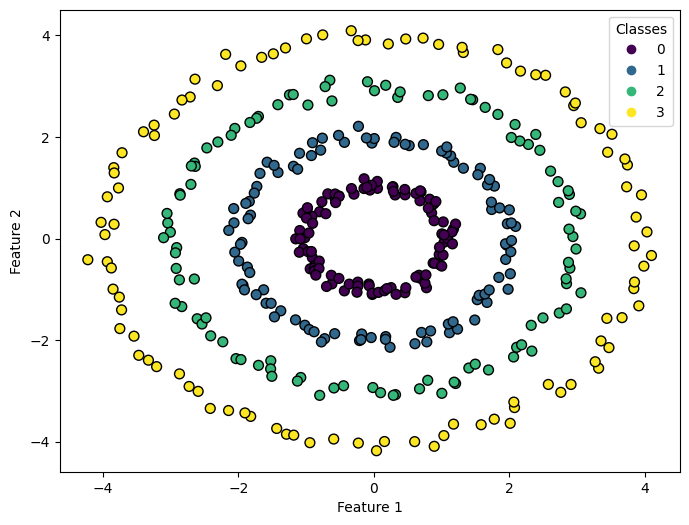

In [ ]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


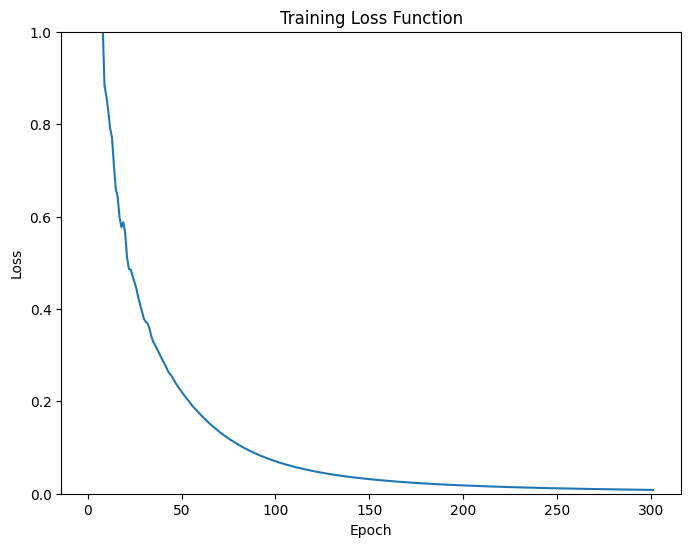


Train data desicion boundaries:



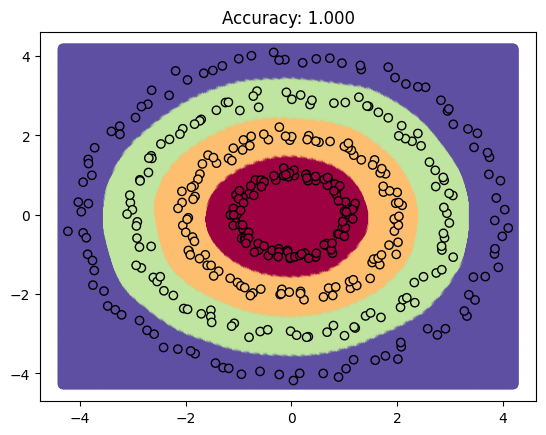


Test data desicion boundaries:



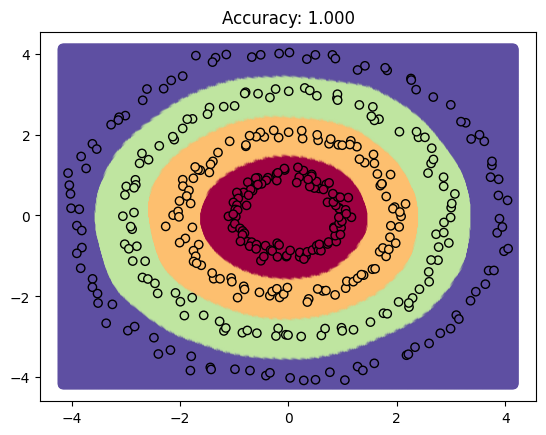

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

input_size = 2
hidden_size = 1024
output_size = 4

mlp_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
).to(device)

lr = 0.005
num_epochs = 300
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=lr)

mlp_model, train_losses = train(mlp_model, X_train, y_train, num_epochs, optimizer, criterion)
plot_loss(train_losses)
print("\nTrain data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_train, y_train)
print("\nTest data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_test, y_test)


Much like in EX2, the data is not linearly seperable but it is quite easy to seperate because points from different classes are not close to each other and the different classes are not mixed.
This is why we tried the same setup from EX2 with a simple MLP, Adam optimizer and the same hyperparameters and got a perfect accuracy.
The fact that the test data is very similar to the training data also highly contributes to the test accuracy.


## EX4

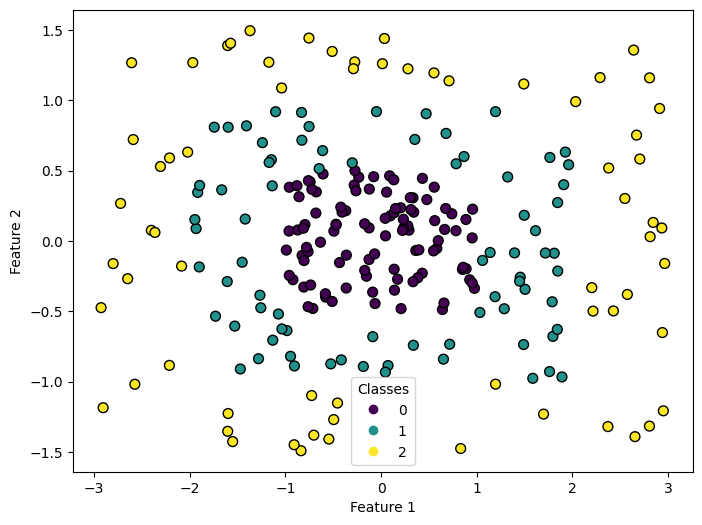

In [ ]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

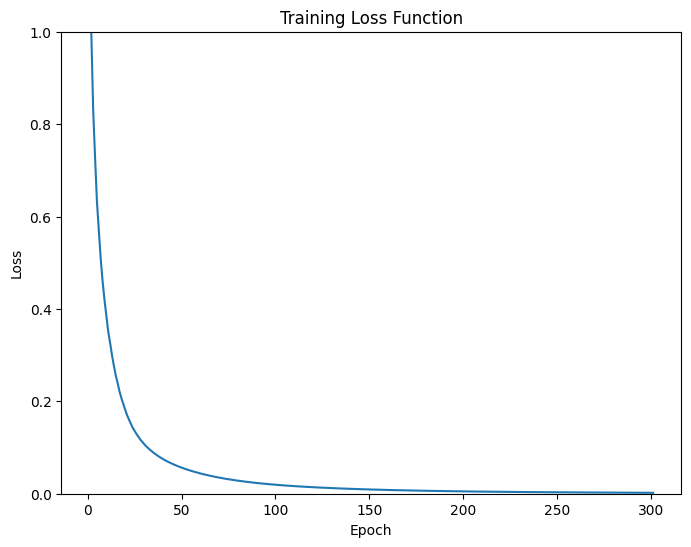


Train data desicion boundaries:



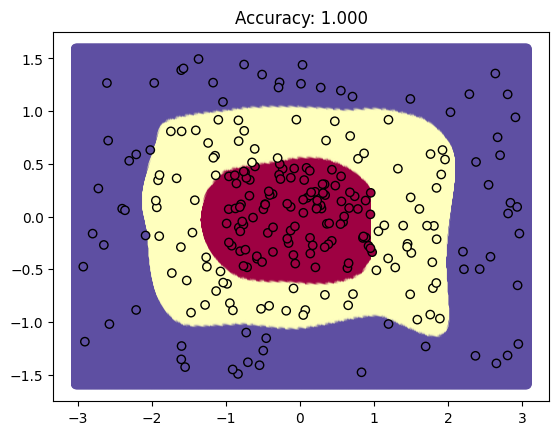


Test data desicion boundaries:



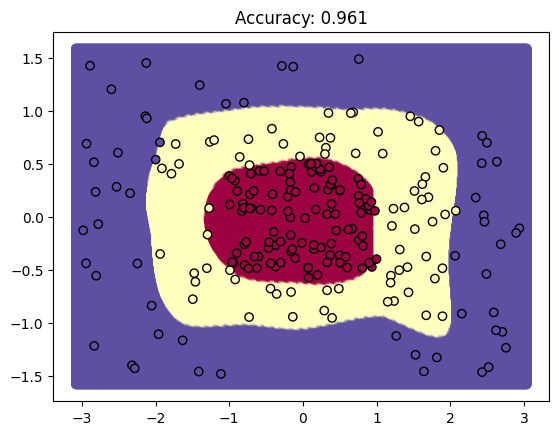

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

input_size = 2
hidden_size = 1024
output_size = 4

mlp_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
).to(device)

lr = 0.001
num_epochs = 300
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=lr)

mlp_model, train_losses = train(mlp_model, X_train, y_train, num_epochs, optimizer, criterion)
plot_loss(train_losses)
print("\nTrain data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_train, y_train)
print("\nTest data desicion boundaries:\n")
plot_decision_boundary(mlp_model, X_test, y_test)


The model perfromed well because the classes quite easy to seperate, but not as easy as the previous exercises because the margin between the different classes is very thin, and around the edges the classes are getting a little bit mixed up. This is why we chose to add another hidden layer to the MLP classifier, so it will have more expressive power to learn the exact decision boundaries.
This helped a little bit but we got stuck at 96% test accuracy even after trying more hidden layers, more neurons in each layer, and played around with the hyperparameters.  

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

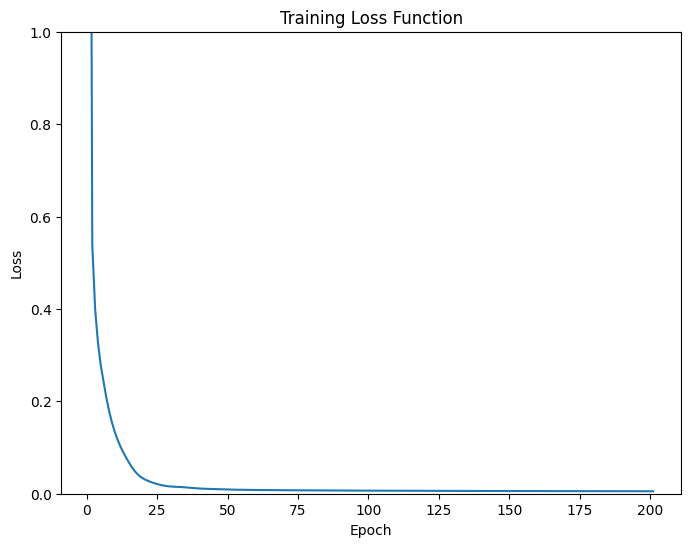


Train accuracy: 0.998


Test accuracy: 0.982



In [17]:
## load numpy array using np.load()

X_train = np.load('/content/ex5_data/X_train.npy')
X_test = np.load('/content/ex5_data/X_test.npy')
y_train = np.load('/content/ex5_data/y_train.npy')
y_test = np.load('/content/ex5_data/y_test.npy')

## Figure out the data dimensions

input_size = X_train.shape[1]
output_size = len(np.unique(y_train))

## Init and train model. Report Accuracy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

hidden_size = 1024

linear_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Linear(hidden_size, output_size),
).to(device)

lr = 0.005
num_epochs = 200
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=lr)

linear_model, train_losses = train(linear_model, X_train, y_train, num_epochs, optimizer, criterion)
plot_loss(train_losses)
train_accuracy = evaluate(linear_model, X_train, y_train)
print(f"\nTrain accuracy: {train_accuracy:.3f}\n")
test_accuracy = evaluate(linear_model, X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.3f}\n")

#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [ ]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [ ]:
### Your code goes here ###
### Imports

### Preprocessing function ####

### Evaluation function ###

### Additional plotting functions ###

## EX6

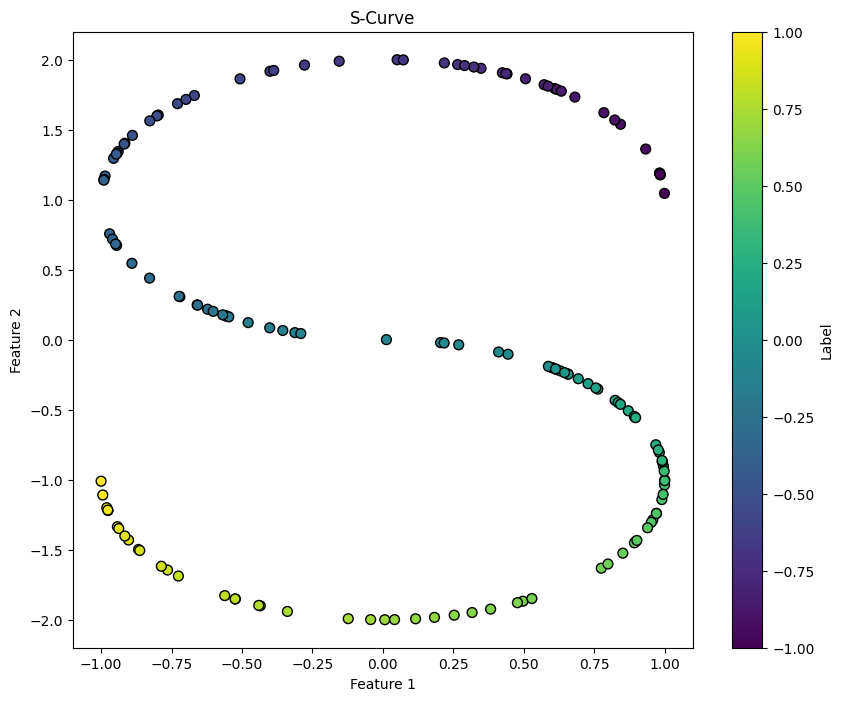

In [ ]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

In [ ]:
### Your code goes here ####


## EX7

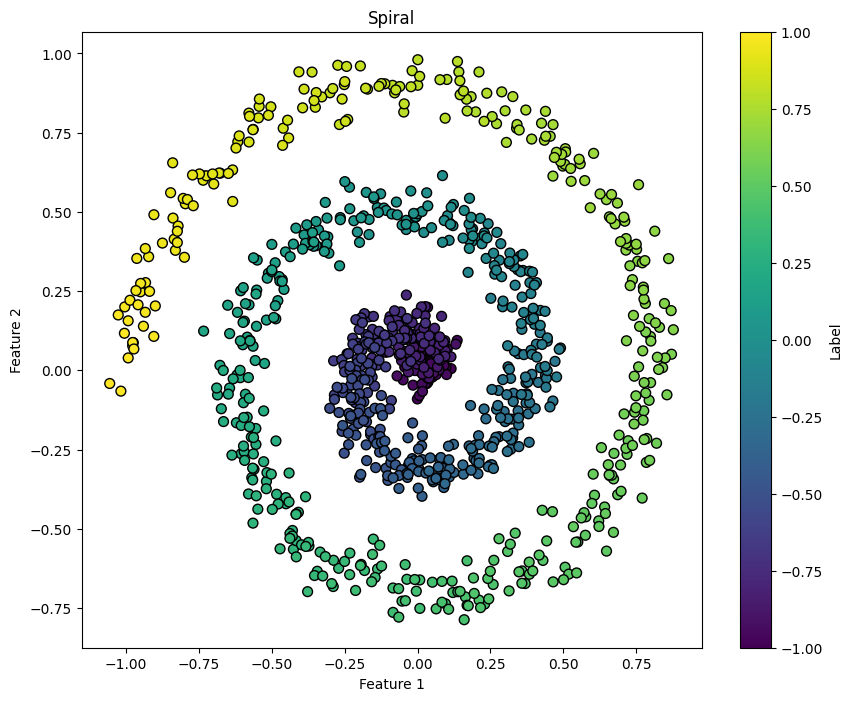

In [ ]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


In [ ]:
### Your code goes here ####

## EX8

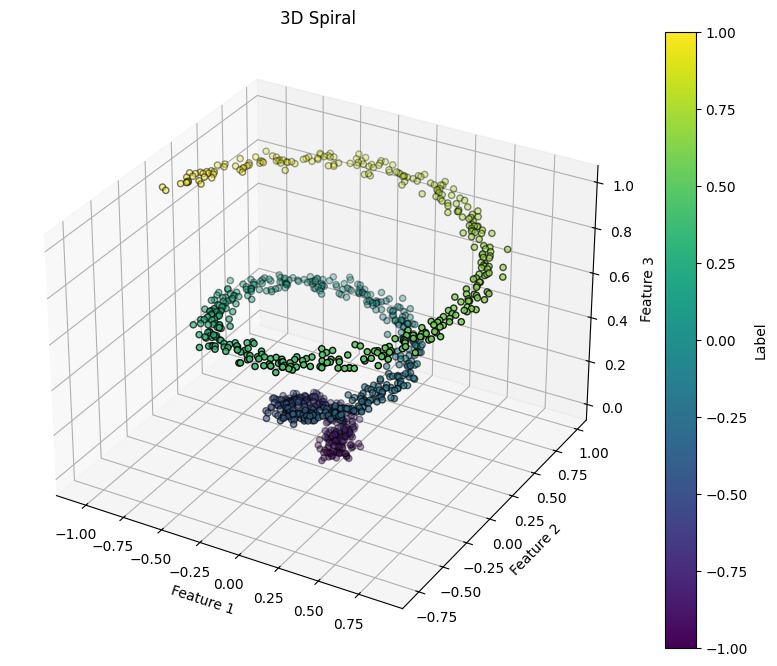

In [ ]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.